In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 24.1 MB/s eta 0:00:00


In [3]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Training on {device}')

model = YOLO('yolov8n-seg.pt').to(device)

Training on cuda


100%|██████████| 6.74M/6.74M [00:00<00:00, 98.3MB/s]


In [5]:
model.info(True)

layer                                     name  gradient   parameters                shape         mu      sigma
    0                      model.0.conv.weight     False          432        [16, 3, 3, 3]   -0.00272      0.151 torch.float32
    1                        model.0.bn.weight     False           16                 [16]       2.88       1.79 torch.float32
    2                          model.0.bn.bias     False           16                 [16]     -0.151       4.02 torch.float32
    3                      model.1.conv.weight     False         4608       [32, 16, 3, 3]   0.000586     0.0613 torch.float32
    4                        model.1.bn.weight     False           32                 [32]       4.64       1.17 torch.float32
    5                          model.1.bn.bias     False           32                 [32]      0.837       1.44 torch.float32
    6                  model.2.cv1.conv.weight     False         1024       [32, 32, 1, 1]   -0.00828     0.0873 torch.float3

(261, 3409968, 0, 12.772710400000001)

In [6]:
model.model.model

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
        

In [7]:
project = "/content/drive/MyDrive/YOLO_segmentation/result_seg/"

In [14]:
results = model.train(
    data="/content/drive/MyDrive/YOLO_segmentation/data.yaml",
    epochs=120,
    batch=32,
    imgsz=640,
    augment=True,
    single_cls=True,
    project=project,
    cos_lr=True,
    freeze=[f'model.{i}' for i in range(21)],
    optimizer='AdamW',
    lr0=0.0005,
    lrf=0.1,
    weight_decay=0.0001,
    plots=True
)


Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/drive/MyDrive/YOLO_segmentation/data.yaml, epochs=120, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:0, workers=8, project=/content/drive/MyDrive/YOLO_segmentation/result_seg/, name=train522, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=['model.0', 'model.1', 'model.2', 'model.3', 'model.4', 'model.5', 'model.6', 'model.7', 'model.8', 'model.9', 'model.10', 'model.11', 'model.12', 'model.13', 'model.14', 'model.15', 'model.16', 'model.17', 'model.18', 'model.19', 'model.20'], multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7,

train: Scanning /content/drive/MyDrive/YOLO_segmentation/train/labels.cache... 78 images, 0 backgrounds, 0 corrupt: 100%|██████████| 78/78 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO_segmentation/valid/labels.cache... 10 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10/10 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/YOLO_segmentation/result_seg/train522/labels.jpg... 
optimizer: AdamW(lr=0.0005, momentum=0.937) with parameter groups 72 weight(decay=0.0), 83 weight(decay=0.0001), 82 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/YOLO_segmentation/result_seg/train522
Starting training for 120 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/120      5.57G     0.9047      1.255     0.7791     0.9335         20        640: 100%|██████████| 3/3 [00:03<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.41s/it]

                   all         10         10      0.973        0.6      0.826      0.639      0.867        0.8      0.873      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/120      5.54G     0.8911      1.242     0.7683     0.9742         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.42it/s]

                   all         10         10      0.767        0.7      0.723      0.535      0.655        0.6      0.616      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/120      5.51G     0.9626      1.468     0.8838     0.9484         22        640: 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]

                   all         10         10      0.817        0.5      0.564      0.291          1      0.385       0.47     0.0866



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/120      5.56G      1.078      1.465     0.8353     0.9793         24        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         10         10      0.553        0.4      0.418      0.231      0.408        0.3      0.258     0.0962



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/120      5.55G      1.059      1.562     0.8886      1.031         18        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.75it/s]

                   all         10         10      0.674        0.4      0.549      0.255      0.279        0.5      0.312      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/120      5.56G      1.011      1.517     0.8562     0.9831         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.39it/s]


                   all         10         10      0.532        0.5      0.409       0.21       0.44        0.4      0.278     0.0461

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/120      5.56G     0.9285      1.322     0.8423     0.9843         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.04it/s]

                   all         10         10      0.565        0.5      0.495      0.301      0.661      0.391      0.373     0.0494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/120      5.56G      1.004      1.425     0.7919      0.966         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.22it/s]

                   all         10         10      0.645        0.4      0.424      0.301      0.645        0.4      0.331     0.0741



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/120      5.56G      1.074      1.415     0.9684     0.9801         18        640: 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.69it/s]

                   all         10         10      0.543        0.4      0.499      0.315      0.543        0.4      0.406       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/120      5.56G     0.8293      1.211     0.7831     0.9094         21        640: 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         10         10      0.981        0.4      0.489      0.329      0.981        0.4      0.486      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/120      5.56G     0.9152      1.386     0.7754      0.962         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.43it/s]

                   all         10         10      0.488        0.8      0.604      0.348      0.772        0.4      0.535      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/120      5.56G     0.9714      1.345     0.8061     0.9713         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         10         10      0.611        0.5      0.587      0.335      0.611        0.5      0.527      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/120      5.56G      1.064      1.404     0.8904      1.018         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.07it/s]

                   all         10         10      0.831      0.494      0.639      0.357      0.831      0.494      0.567      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/120      5.56G      1.071      1.341     0.8815      1.008         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.79it/s]


                   all         10         10      0.689        0.6       0.68      0.429      0.689        0.6      0.623      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/120      5.56G       1.15      1.606      0.978     0.9982         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.92it/s]

                   all         10         10      0.834        0.6      0.746      0.506      0.694        0.5      0.565      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/120      5.56G     0.9743      1.468     0.8707     0.9668         20        640: 100%|██████████| 3/3 [00:02<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

                   all         10         10      0.777      0.698      0.788      0.531      0.659      0.582        0.6      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/120      5.51G     0.8757       1.14     0.7512     0.9261         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         10      0.872      0.685      0.753      0.518       0.75        0.6      0.649      0.226



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/120      5.57G     0.8938      1.376     0.7879     0.9562         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         10         10      0.734        0.7      0.741      0.528      0.734        0.7      0.741      0.271



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/120      5.56G      1.025      1.324     0.8311     0.9433         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.53it/s]

                   all         10         10          1      0.589      0.771      0.553          1      0.589      0.771       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/120      5.57G     0.9441      1.215     0.7906     0.9532         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]

                   all         10         10      0.797      0.785      0.808      0.535      0.759        0.7      0.737      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/120      5.56G     0.8863      1.135     0.7333     0.9256         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.05it/s]

                   all         10         10      0.798      0.791      0.813      0.544      0.798      0.791        0.8      0.301



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/120      5.56G     0.9163      1.269     0.7369     0.9397         24        640: 100%|██████████| 3/3 [00:02<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         10         10      0.796      0.783      0.802      0.561      0.796      0.783      0.787      0.279



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/120      5.57G     0.8819       1.19     0.7528      0.908         22        640: 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.72it/s]

                   all         10         10      0.796      0.782       0.82       0.59      0.796      0.782      0.805      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/120      5.57G     0.9251      1.365     0.8319      1.003         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.05it/s]

                   all         10         10          1      0.683      0.833       0.62          1      0.683      0.821      0.309



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/120      5.57G     0.9703      1.217     0.7372     0.9169         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.67it/s]

                   all         10         10          1      0.692       0.83      0.627          1      0.692      0.819      0.319



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/120      5.57G     0.9398      1.239      0.735     0.9248         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         10         10          1      0.698      0.831      0.611          1      0.698      0.821       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/120      5.57G     0.8962        1.2     0.8276       0.91         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.83it/s]

                   all         10         10          1      0.699      0.832      0.615          1      0.699      0.821      0.334



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/120      5.56G      0.949       1.24      0.799     0.9536         19        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.49it/s]

                   all         10         10      0.991        0.7      0.818      0.618          1      0.794      0.869      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/120      5.56G     0.8191       1.19     0.7417     0.9214         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.04it/s]

                   all         10         10       0.99        0.7      0.808      0.622      0.998        0.8      0.856      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/120      5.57G     0.8802      1.214     0.7311     0.9354         22        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.59it/s]

                   all         10         10      0.985        0.7      0.812      0.607      0.987        0.8       0.84      0.376



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/120      5.57G     0.9159      1.338     0.8232     0.9398         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         10         10      0.994        0.7      0.814      0.572      0.986        0.8      0.842       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/120      5.57G     0.9122      1.364     0.7619     0.9695         29        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.39it/s]

                   all         10         10          1      0.688      0.807      0.561      0.976        0.8      0.864      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/120      5.57G     0.9055      1.288     0.7659     0.9346         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.46it/s]

                   all         10         10          1      0.694      0.811      0.552      0.974        0.8      0.869      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/120      5.57G     0.9778      1.312     0.7871     0.9333         31        640: 100%|██████████| 3/3 [00:01<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.52it/s]

                   all         10         10          1      0.681      0.816      0.566      0.881        0.8      0.865      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/120      5.57G     0.8479      1.213      0.734     0.9207         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.48it/s]

                   all         10         10          1      0.693      0.819      0.587      0.888      0.795      0.872      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/120      5.57G     0.8465      1.199      0.704     0.9072         21        640: 100%|██████████| 3/3 [00:02<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.70it/s]

                   all         10         10      0.993        0.7      0.827      0.627      0.993        0.7      0.838      0.361



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/120      5.57G     0.8843      1.271     0.7635     0.9214         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         10         10      0.988        0.7      0.819      0.615      0.988        0.7      0.823      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/120      5.56G     0.8482      1.171     0.7308     0.9375         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         10         10      0.984        0.7      0.816      0.621      0.984        0.7      0.832      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/120      5.57G      0.877      1.261     0.7639     0.9405         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.62it/s]

                   all         10         10      0.977        0.7      0.812      0.589      0.977        0.7      0.812      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/120      5.57G     0.8413      1.142     0.7397     0.9127         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.78it/s]

                   all         10         10      0.957        0.7      0.822      0.601      0.957        0.7      0.828       0.36



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/120      5.57G     0.8307      1.201     0.6757     0.9037         25        640: 100%|██████████| 3/3 [00:01<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.28it/s]

                   all         10         10      0.952        0.7       0.82      0.607      0.952        0.7      0.827      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/120      5.57G     0.9224      1.313     0.7758     0.9343         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.65it/s]

                   all         10         10       0.97        0.7      0.826      0.636       0.97        0.7      0.832      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/120      5.57G     0.8339      1.093     0.7029     0.9492         27        640: 100%|██████████| 3/3 [00:02<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.72it/s]

                   all         10         10      0.976        0.7      0.816       0.62      0.976        0.7      0.827      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/120      5.53G      0.895      1.138     0.7175     0.9433         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         10         10      0.983        0.7      0.824      0.637      0.983        0.7      0.824      0.346



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/120      5.57G     0.7914      1.072     0.6656     0.9073         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         10         10      0.995        0.7      0.816       0.62      0.995        0.7      0.816      0.327



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/120      5.56G     0.8423      1.162     0.6792     0.9368         30        640: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         10         10          1       0.69      0.811      0.619          1       0.69      0.811      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/120      5.56G     0.9233      1.236     0.7531     0.9719         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.73it/s]

                   all         10         10          1      0.685      0.814        0.6          1      0.685      0.814      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     48/120      5.57G     0.8165      1.128     0.6498     0.9037         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.76it/s]

                   all         10         10          1      0.676      0.802      0.563          1      0.676      0.827      0.349



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     49/120      5.56G     0.9347      1.248     0.7585     0.9492         25        640: 100%|██████████| 3/3 [00:01<00:00,  1.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.74it/s]

                   all         10         10          1      0.681      0.806      0.561          1      0.681      0.831      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     50/120      5.57G     0.8805      1.333      0.725     0.9503         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.25it/s]


                   all         10         10      0.983        0.7      0.823      0.559      0.886      0.781      0.867      0.385

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     51/120      5.57G     0.8696      1.231     0.7259     0.9433         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.45it/s]

                   all         10         10      0.972        0.7      0.836      0.582      0.846        0.8      0.872      0.386



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     52/120      5.57G     0.8372      1.079     0.6765     0.9143         19        640: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.41it/s]

                   all         10         10      0.872        0.7      0.846      0.572      0.973        0.8      0.884      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     53/120      5.56G     0.9211      1.288     0.7483     0.9307         34        640: 100%|██████████| 3/3 [00:01<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10         10      0.848        0.7      0.827       0.57      0.969        0.8       0.88       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     54/120      5.56G      0.759      1.093     0.6592     0.9349         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.37it/s]

                   all         10         10      0.873      0.689      0.806      0.587          1      0.784       0.87      0.368



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     55/120      5.57G     0.8328      1.087     0.7084     0.9303         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         10         10      0.702        0.7      0.793      0.575       0.97        0.7      0.858      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     56/120      5.57G      0.892      1.182     0.7539     0.8922         24        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.45it/s]

                   all         10         10      0.648        0.8      0.781      0.543      0.979        0.7      0.839      0.385



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     57/120      5.57G      0.863      1.143     0.7167     0.8773         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.00it/s]

                   all         10         10       0.69        0.8      0.794      0.549      0.989        0.7      0.835      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     58/120      5.57G     0.7734      1.151     0.6626      0.915         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         10      0.704        0.8      0.799      0.565          1      0.699      0.835      0.369



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     59/120      5.56G      0.777       1.18     0.6789      0.914         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.51it/s]

                   all         10         10      0.708        0.8      0.809      0.561          1      0.697      0.843       0.35



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     60/120      5.52G      0.767      1.129     0.6665     0.9121         18        640: 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         10         10      0.716        0.8      0.801      0.565          1      0.697      0.854       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     61/120      5.56G     0.8701       1.22     0.7042     0.9005         13        640: 100%|██████████| 3/3 [00:01<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.64it/s]

                   all         10         10      0.836        0.7      0.817      0.566      0.972        0.8      0.869      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     62/120      5.56G     0.8451       1.17     0.6774      0.928         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.50it/s]

                   all         10         10       0.84        0.7      0.806      0.594      0.963        0.8      0.869      0.383



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     63/120      5.56G     0.8162      1.075     0.7003     0.8634         15        640: 100%|██████████| 3/3 [00:01<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.69it/s]

                   all         10         10      0.857        0.7      0.805      0.589      0.985        0.8      0.868      0.377



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     64/120      5.57G     0.7968      1.136     0.6904     0.9233         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         10         10       0.86        0.7      0.812       0.59      0.988        0.8      0.869       0.39



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     65/120      5.57G     0.7617      1.024     0.6638     0.8947         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         10         10      0.861        0.7      0.812        0.6       0.99        0.8      0.863      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     66/120      5.57G     0.7958      1.115     0.6829     0.9112         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.72it/s]

                   all         10         10      0.865        0.7      0.802      0.577      0.994        0.8      0.862      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     67/120      5.52G     0.8451      1.103     0.6821     0.9264         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.85it/s]

                   all         10         10      0.867        0.7      0.801      0.576      0.998        0.8      0.885      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     68/120      5.57G     0.6944      1.005     0.6136     0.9017         29        640: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.88it/s]

                   all         10         10      0.873        0.7      0.797      0.543          1      0.797      0.886      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     69/120      5.57G     0.8416      1.209     0.6745     0.8901         28        640: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.64it/s]

                   all         10         10      0.875      0.699      0.797       0.55      0.875      0.699       0.82      0.395



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     70/120      5.56G     0.8482      1.082     0.6674     0.9338         26        640: 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.96it/s]

                   all         10         10      0.872        0.7      0.807       0.53      0.872        0.7      0.807      0.388



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     71/120      5.57G     0.8207      1.026     0.6928     0.9606         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.65it/s]

                   all         10         10      0.871        0.7      0.814      0.538      0.871        0.7      0.834      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     72/120      5.56G     0.6675     0.9998     0.6044     0.8971         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         10         10      0.875      0.699      0.821      0.548      0.875      0.699      0.837      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     73/120      5.57G     0.7414      1.202     0.6648     0.9157         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.90it/s]

                   all         10         10      0.874        0.7      0.828      0.554          1      0.795       0.91        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     74/120      5.57G     0.7669     0.9782     0.6723      0.898         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.79it/s]

                   all         10         10      0.875        0.7      0.837      0.567          1      0.787       0.91      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     75/120      5.51G     0.8272       1.06     0.7041      0.906         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

                   all         10         10      0.861        0.7       0.84       0.55          1      0.792      0.913      0.384



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     76/120      5.56G     0.7434      1.081     0.6542      0.896         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.86it/s]

                   all         10         10      0.787        0.7      0.848       0.58      0.937        0.8      0.898      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     77/120      5.57G     0.8142      1.187     0.6713     0.9166         29        640: 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.97it/s]

                   all         10         10      0.775        0.7      0.849      0.577      0.888        0.8      0.899      0.392



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     78/120      5.57G     0.7721      1.019     0.6318     0.9113         24        640: 100%|██████████| 3/3 [00:01<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.76it/s]

                   all         10         10      0.774        0.7      0.842      0.592      0.887        0.8      0.895      0.389



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     79/120      5.57G      0.773      1.337      0.674     0.8996         26        640: 100%|██████████| 3/3 [00:01<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         10         10      0.774        0.7      0.844      0.582      0.887        0.8      0.897      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     80/120      5.56G     0.7151      1.046     0.6063     0.8781         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all         10         10      0.777        0.7      0.839      0.585      0.895        0.8      0.888      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     81/120      5.57G     0.7633      1.184     0.6598     0.9097         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         10         10      0.805        0.7      0.841      0.562      0.926        0.8       0.89       0.37



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     82/120      5.56G     0.8002       1.08     0.6228     0.9115         31        640: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.80it/s]

                   all         10         10      0.832        0.7      0.835      0.578      0.953        0.8      0.886      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     83/120      5.56G     0.7196      1.074     0.6684     0.8616         18        640: 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]

                   all         10         10      0.834        0.7      0.828      0.567      0.953        0.8      0.884      0.351



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     84/120      5.56G     0.7651      1.079     0.6708     0.9341         18        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.36it/s]

                   all         10         10          1      0.689       0.85      0.587      0.964        0.8      0.888      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     85/120      5.58G      0.711      1.004     0.6084     0.8811         27        640: 100%|██████████| 3/3 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]


                   all         10         10          1      0.696      0.847      0.599       0.97        0.8      0.886      0.368

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     86/120      5.56G     0.6861     0.9956      0.652     0.8932         17        640: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.26it/s]


                   all         10         10          1      0.697      0.845      0.597      0.974        0.8      0.884      0.376

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     87/120      5.57G     0.7829      1.173     0.6461     0.9177         23        640: 100%|██████████| 3/3 [00:01<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

                   all         10         10          1      0.697      0.847      0.601      0.976        0.8      0.885      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     88/120      5.57G     0.6866      1.025     0.6212     0.8654         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.94it/s]

                   all         10         10      0.963        0.7      0.854      0.586       0.98        0.8       0.89      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     89/120      5.52G     0.7155      1.023     0.6446     0.8847         20        640: 100%|██████████| 3/3 [00:01<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.63it/s]

                   all         10         10      0.942        0.7      0.852      0.582       0.98        0.8      0.888      0.387



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     90/120      5.56G     0.7592      1.083     0.6671     0.9041         26        640: 100%|██████████| 3/3 [00:01<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.71it/s]

                   all         10         10      0.926        0.7       0.85      0.569      0.979        0.8      0.891      0.371



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     91/120      5.57G     0.8614      1.132     0.6713     0.8934         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.34it/s]

                   all         10         10      0.936        0.7      0.849       0.57      0.976        0.8       0.89      0.356



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     92/120      5.44G     0.7429      1.135     0.5987     0.8789         25        640: 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         10         10      0.809        0.7      0.837      0.559      0.927        0.8       0.89      0.353



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     93/120      5.52G     0.7538     0.9862     0.6449     0.9055         20        640: 100%|██████████| 3/3 [00:01<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all         10         10      0.777        0.7      0.836       0.56      0.916        0.8      0.889      0.364



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     94/120      5.57G     0.7492      1.157     0.6478     0.8887         28        640: 100%|██████████| 3/3 [00:01<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.86it/s]

                   all         10         10      0.955        0.6      0.826      0.548      0.872        0.8      0.873      0.359



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     95/120      5.56G     0.6887     0.9224     0.6306     0.8738         17        640: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.20it/s]

                   all         10         10      0.955        0.6      0.826      0.544      0.881        0.8      0.873      0.345



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     96/120      5.57G     0.7063      1.001     0.6099     0.8935         21        640: 100%|██████████| 3/3 [00:01<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.10it/s]

                   all         10         10      0.953        0.6      0.819       0.56          1      0.683      0.865      0.365



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     97/120      5.57G     0.7355      1.048     0.6041     0.8848         23        640: 100%|██████████| 3/3 [00:01<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

                   all         10         10      0.954        0.6      0.819      0.561          1       0.68      0.865      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     98/120      5.57G     0.7921      1.115     0.6649     0.9073         21        640: 100%|██████████| 3/3 [00:01<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.30it/s]


                   all         10         10      0.958        0.6       0.82      0.561          1      0.674      0.866      0.345

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     99/120      5.56G      0.804      1.148     0.6636     0.8971         22        640: 100%|██████████| 3/3 [00:01<00:00,  2.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.27it/s]

                   all         10         10      0.959        0.6      0.821      0.561          1      0.673      0.867      0.337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    100/120      5.57G     0.7829      1.068      0.654     0.8972         27        640: 100%|██████████| 3/3 [00:01<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]


                   all         10         10      0.962        0.6      0.831      0.563      0.884      0.768      0.866      0.343

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    101/120      5.54G      0.664      1.037     0.5827     0.8638         16        640: 100%|██████████| 3/3 [00:01<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.54it/s]

                   all         10         10      0.962        0.6      0.832      0.563      0.886      0.777      0.867      0.354
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 1, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



101 epochs completed in 0.091 hours.
Optimizer stripped from /content/drive/MyDrive/YOLO_segmentation/result_seg/train522/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/YOLO_segmentation/result_seg/train522/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/YOLO_segmentation/result_seg/train522/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 213 layers, 2,936,979 parameters, 0 gradients, 10.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.16it/s]


                   all         10         10      0.973        0.6      0.826       0.64      0.866        0.8      0.873      0.373
Speed: 0.2ms preprocess, 4.9ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/YOLO_segmentation/result_seg/train522


In [15]:
resul = results.class_result(0)
print("Precision:", resul[0],
      "Recall:", resul[1],
      "mAP@50:", resul[2],
      "mAP@50-95:", resul[3],
      "Box Precision:", resul[4],
      "Box Recall:", resul[5],
      "Mask Precision:", resul[6],
      "Mask Recall:", resul[7])


Precision: 0.9733751608751608 Recall: 0.6 mAP@50: 0.8262791783380018 mAP@50-95: 0.639662762806272 Box Precision: 0.8664614536289027 Box Recall: 0.8 Mask Precision: 0.8733380018674134 Mask Recall: 0.3725728412054477


# Tuning:
All these are done at epochs = 20.
- adjusting lr0 and lrf:
  - At lr0: 0.0001:
    - Precision: 0.6852216975673765
    - Recall: 0.8
    - mAP@50: 0.7825151515151515
    - mAP@50-95: 0.5873152944539737
    - Box Precision: 0.8653535089912061
    - Box Recall: 0.8
    - Mask Precision: 0.8858459595959597
    - Mask Recall: 0.39754941348364997
    - #### **The loss fluctuates alot.**
  - At lr0: 0.001, weight_decay: 0.005:
    - Precision: 0.7596847851867932
    - Recall: 0.7
    - mAP@50: 0.8154105126899246
    - mAP@50-95: 0.6016188764166468
    - Box Precision: 0.8698578096168458
    - Box Recall: 0.8 Mask Precision: 0.8712070707070707
    - Mask Recall: 0.3996115807026623
    - #### **The loss still fluctuates**
  - At lr0: 0.0005 & epochs: 50:
    - Precision: 1.0
    - Recall: 0.7802640876170288
    - mAP@50: 0.9142307692307694
    - mAP@50-95: 0.6398655702405703
    - Box Precision: 1.0
    - Box Recall: 0.7802640876170288
    - Mask Precision: 0.9142307692307694
    - Mask Recall: 0.406044642857143

  - At lr0: 0.0005, epochs = 100, weight_decay: 0.005:
    -Precision: 0.997390593135274
    - Recall: 0.6
    - mAP@50: 0.8333116883116884
    - mAP@50-95: 0.5585486056579081
    - Box Precision: 1.0
    - Box Recall: 0.6787530276891979
    - Mask Precision: 0.8435714285714287
    - Mask Recall: 0.36402823920265787
  - At lr0: 0.0005, epochs = 120, weight_decay: 0.005:
    - Precision: 0.9841010569982532
    - Recall: 0.6
    - mAP@50: 0.8727777777777778
    - mAP@50-95: 0.5961527777777778
    - Box Precision: 0.9841010569982532
    - Box Recall: 0.6
    - Mask Precision: 0.8727777777777778
    - Mask Recall: 0.32916276595744687




## At epochs: 120, Batch: 64 :
- Precision: 0.762972712972713
- Recall: 0.8
- mAP@50: 0.8790277777777779
- mAP@50-95: 0.5513908319724188 Box Precision: 0.8092568217568218
- Box Recall: 0.8509125196625197
- Mask Precision: 0.8858459595959597
- Mask Recall: 0.34535956874130525

## With cos_lr, epochs: 120, Batch: 32 :
- Precision: 0.8486978085371659
- Recall: 0.5645307958560971
- mAP@50: 0.7806617647058822
- mAP@50-95: 0.5759162310795877
- Box Precision: 0.9970178511845175
- Box Recall: 0.7
- Mask Precision: 0.86492673992674
- Mask Recall: 0.3959106675889047

## Now, with lr0 = 0.001 and lrf = 0.1 :
- Precision: 0.8460661096826674
- Recall: 0.5534776606672032
- mAP@50: 0.7806617647058822
- mAP@50-95: 0.5758591418385535
- Box Precision: 1.0
- Box Recall: 0.6923348184786092
- Mask Precision: 0.8656015037593986
- Mask Recall: 0.3959457002690846



# Freezing first 21 layers:
  ### At Epochs: 150, weight decay: 0.005
  - Precision: 0.9937058907647143
  - Recall: 0.7
  - mAP@50: 0.8431792717086836
  - mAP@50-95: 0.5907995478289597
  - Box Precision: 0.867946080693712
  - Box Recall: 0.8
  - Mask Precision: 0.9177124183006535
  - Mask Recall: 0.32904869331771713

### At Epochs: 120, weight decay: 0.001, batch = 64
  - Precision: 0.9937058907647143
  - Recall: 0.7
  - mAP@50: 0.8431792717086836
  - mAP@50-95: 0.5907995478289597
  - Box Precision: 0.867946080693712
  - Box Recall: 0.8
  - Mask Precision: 0.9177124183006535
  - Mask Recall: 0.32904869331771713

# Freezing first 20 layers:
  ### At epoch: 120, weight_decay = 0.0001, batch: 32
  - Precision: 0.9733751608751608
  - Recall: 0.6
  - mAP@50: 0.8262791783380018
  - mAP@50-95: 0.639662762806272
  - Box Precision: 0.8664614536289027
  - Box Recall: 0.8
  - Mask Precision: 0.8733380018674134
  - Mask Recall: 0.3725728412054477



In [16]:
predictions = model.predict(source="/content/drive/MyDrive/YOLO_segmentation/test/images", conf=0.5)


WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 1/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im16_jpg.rf.289afe74e9d8261d9a5d5b7d3d33639c.jpg: 640x640 (no detections), 20.2ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 2/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im2_jpg.rf.635eefcb544aa19551593d9be0bf587b.jpg: 640x640 1 Gun, 18.5ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 3/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im31_jpg.rf.d87fad48239ff2ee11e403863dd5091a.jpg: 640x640 1 Gun, 17.0ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 4/10 /content/drive/MyDrive/YOLO_segmentation/test/images/im33_jpg.rf.156678fbf993feccf3bac0184a45d645.jpg: 640x640 1 Gun, 17.4ms
WARNING ⚠️ Model does not support 'augment=True', reverting to single-scale prediction.
image 

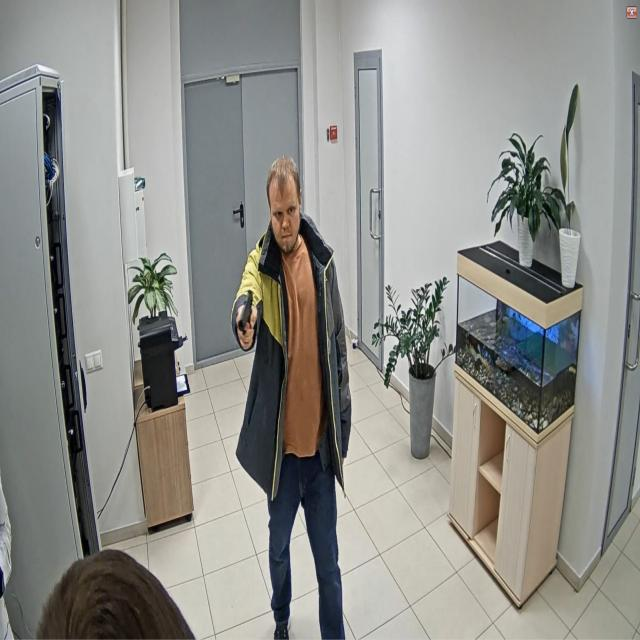

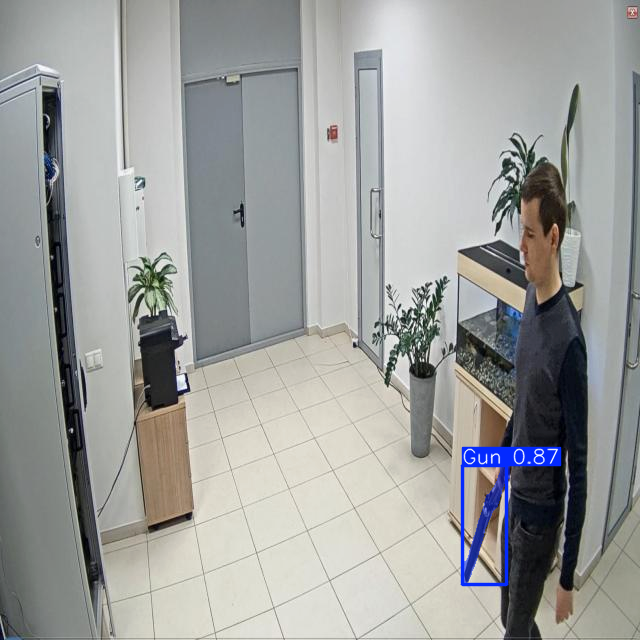

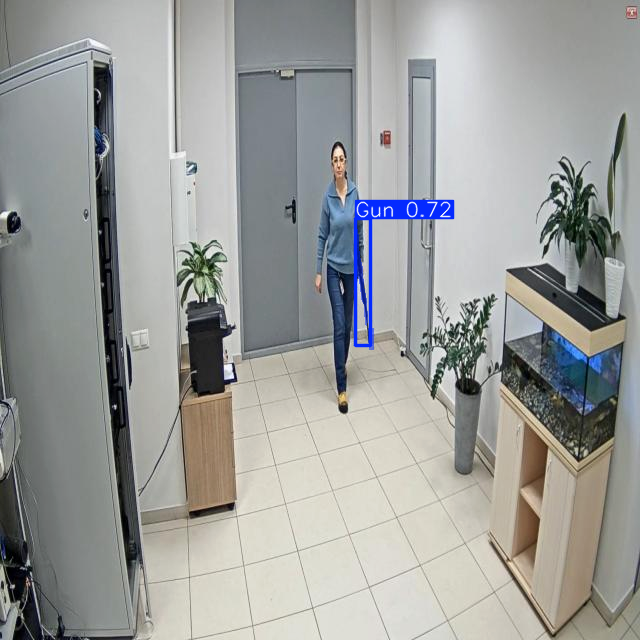

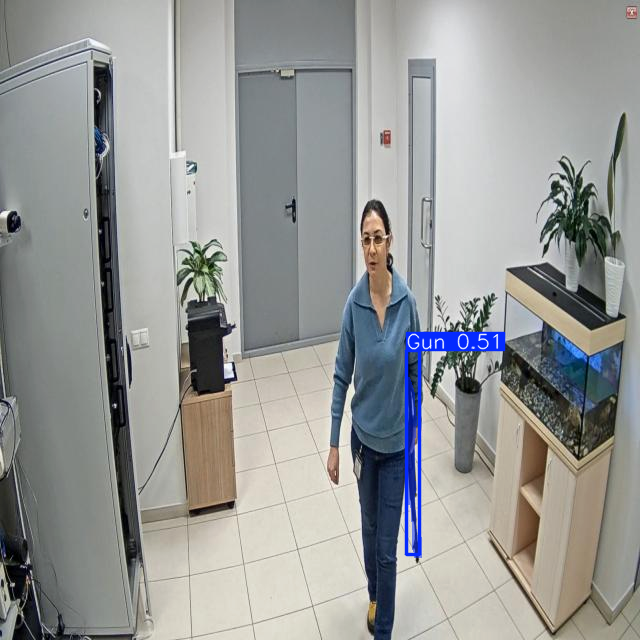

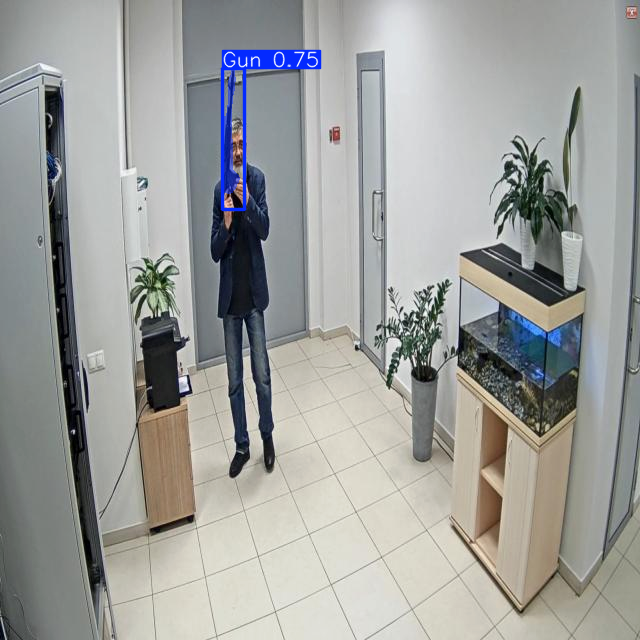

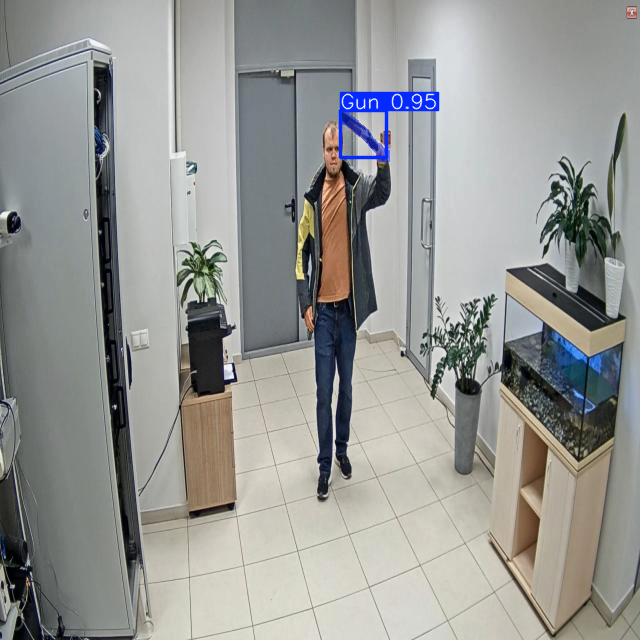

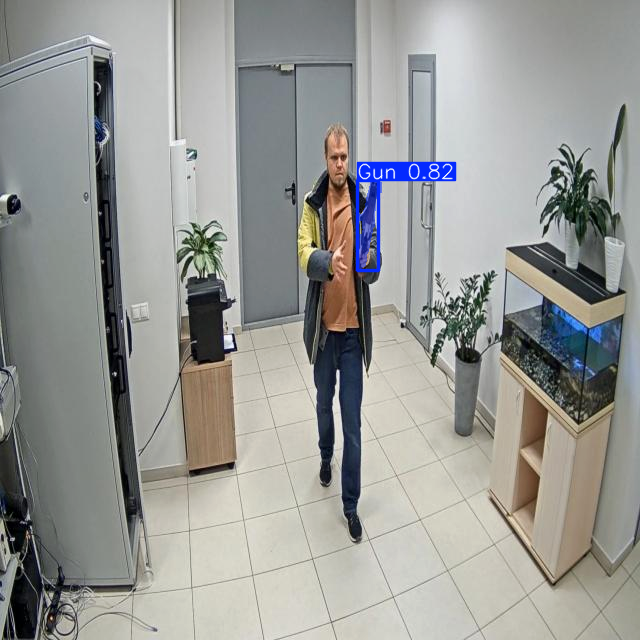

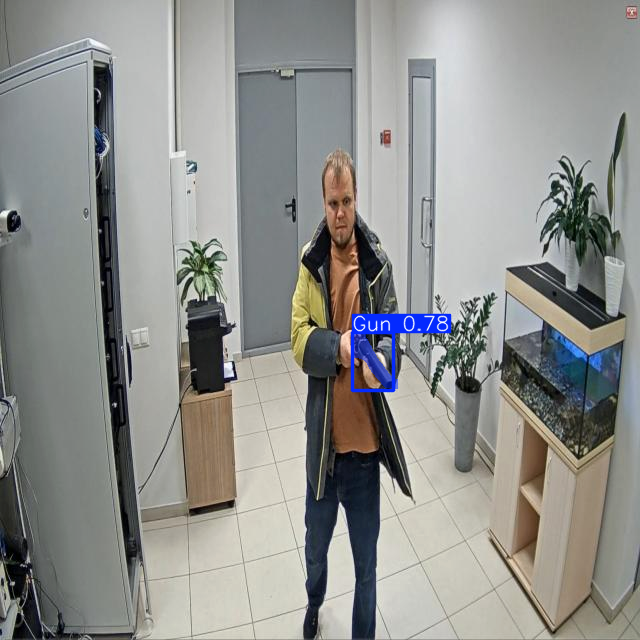

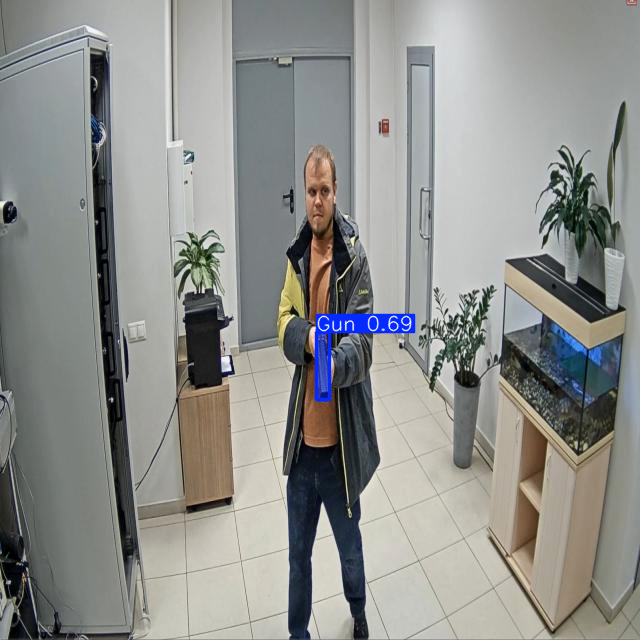

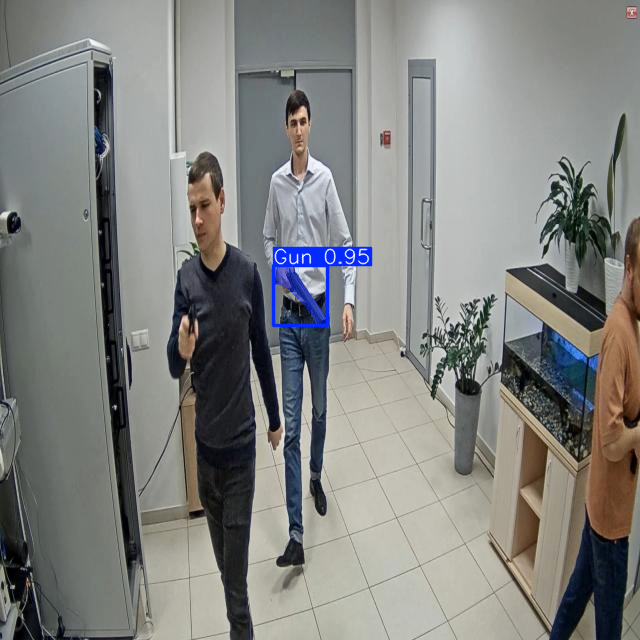

In [17]:
for result in predictions:
  result.show()